# Stack Overflow Data - 2017 Survey

## Imports necessary for first analisys

In [37]:
import seaborn as sns
sns.set_theme(style="darkgrid")

import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
%config IPCompleter.greedy=True

In [2]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [3]:
df.shape

(51392, 154)

## Question

1. Happiness
2. Happiness and salary
3. Professional and happiness
4. Language and happiness



## Analysis

In [16]:
df.JobSatisfaction.unique()

array([nan,  9.,  3.,  8.,  6.,  7.,  5.,  4., 10.,  2.,  0.,  1.])

### We are use only tree categorical values
sad -> <=4

neutral -> >4 && <= 7

happy -> >7

In [45]:
df['JobSatisfactionCategorical'] = np.where(df.JobSatisfaction > 7, 'happy', 
         (np.where(df.JobSatisfaction > 4, 'neutral', 'sad')))

In [46]:
df[['JobSatisfactionCategorical','JobSatisfaction']].head(10)

,JobSatisfactionCategorical,JobSatisfaction
0,sad,NaN
1,sad,NaN
2,happy,9.0
3,sad,3.0
4,happy,8.0
5,sad,NaN
6,neutral,6.0
7,neutral,7.0
8,neutral,6.0
9,happy,8.0


## 1. Happiness

In [47]:
df.JobSatisfactionCategorical.value_counts()

happy      18704
neutral    16444
sad        16244
Name: JobSatisfactionCategorical, dtype: int64

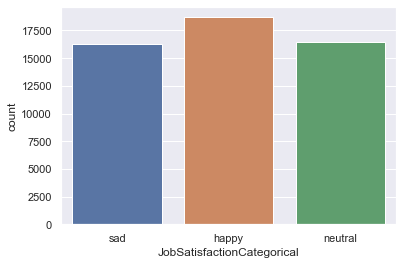

In [48]:
sns.countplot(x="JobSatisfactionCategorical", 
                   data=df, 
                  );

### Many happy employers, huhuuuuu

## 2. Happiness and salary
Lets made a division, salary mean

salary_mean > acima

salary_mean <= abaixo

In [52]:
 df.Salary.mean()

56298.480640629256

In [49]:
df['SalaryCategorical'] = np.where(df.Salary > df.Salary.mean(), 1, 0)

In [50]:
df.SalaryCategorical.value_counts()

0    45831
1     5561
Name: SalaryCategorical, dtype: int64

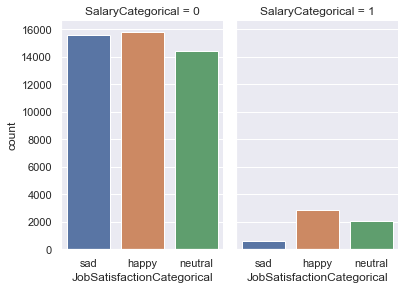

In [51]:
g = sns.catplot(x="JobSatisfactionCategorical", col="SalaryCategorical",
                data=df, kind="count",
                height=4, aspect=.7);

## have many people with low satisfaction when have money above mean.

# 3. Professional and happiness

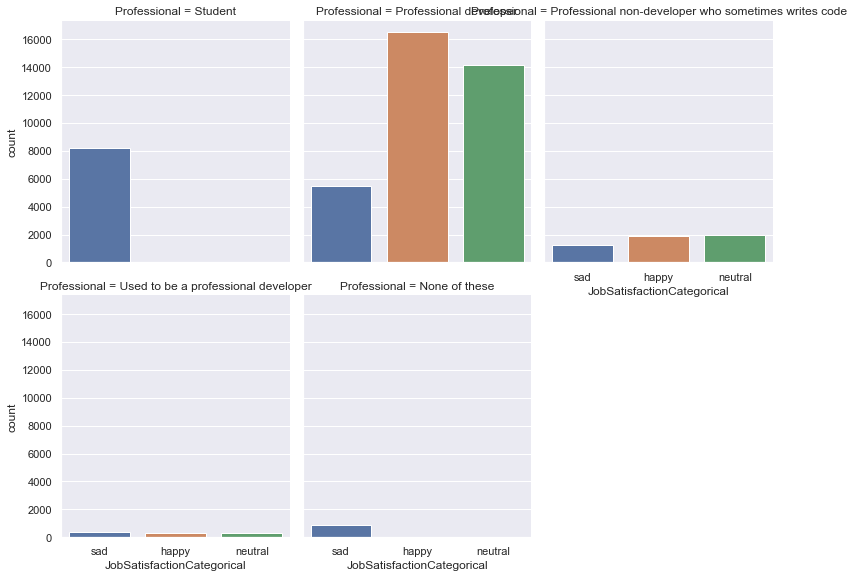

In [77]:
g = sns.catplot(x="JobSatisfactionCategorical", col="Professional",
                data=df, kind="count",
                height=4, aspect=.9, col_wrap=3);

# 4. Language and happiness

In [78]:
cols = ['HaveWorkedLanguage', 'WantWorkLanguage', 'JobSatisfactionCategorical', 'JobSatisfaction']
df2 = df[cols]

In [79]:
df2.shape

(51392, 4)

In [80]:
df2 = df2.dropna()

In [81]:
df2.shape

(27680, 4)

In [82]:
df2.head()

,HaveWorkedLanguage,WantWorkLanguage,JobSatisfactionCategorical,JobSatisfaction
2,Java; PHP; Python,C; Python; Rust,happy,9.0
3,Matlab; Python; R; SQL,Matlab; Python; R; SQL,sad,3.0
6,Matlab; Python,JavaScript; Julia; Matlab; Python; R; SQL,neutral,6.0
7,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,Clojure; Elixir; Haskell; Scala,neutral,7.0
8,C#; JavaScript,F#; Go,neutral,6.0


In [83]:
dict_professional = {}
for index, row in df2.iterrows():
        temp_value = row['HaveWorkedLanguage'].split(";")
        list_temp = [x.strip(' ') for x in temp_value]
        for value in list_temp:
            if value in dict_professional.keys():
                mean = dict_professional[value]
                mean = (mean + row['JobSatisfaction']) / 2
            else:
                dict_professional[value] = row['JobSatisfaction']

In [103]:
data = {'language': dict_professional.keys(), 'mean': dict_professional.values()}
df_3 = pd.DataFrame.from_dict(data)
df_3['Mean'] = df_3['mean'].astype(int)
df_3['meanCategorical'] = np.where(df_3['Mean'] > 7, 'happy', 
         (np.where(df_3['Mean'] > 4, 'neutral', 'sad')))

In [111]:
df_3.sort_values('Mean', ascending = False).head(10)

,language,mean,Mean,meanCategorical
33,Julia,10.0,10,happy
31,Common Lisp,10.0,10,happy
0,Java,9.0,9,happy
2,Python,9.0,9,happy
25,Lua,9.0,9,happy
23,F#,9.0,9,happy
1,PHP,9.0,9,happy
15,Swift,8.0,8,happy
24,TypeScript,8.0,8,happy
21,Perl,8.0,8,happy


## Conclusion

### The number of people satisfied with working with development is very large, it is not possible to see any very expressive bar in the graphics. This is good, it would be better if happiness was always greater than sad.
### About the programming language, the values ​​10 were curious, but the values ​​9 are well spread out. 